In [2]:
import numpy as np
import pandas as pds
from scipy import stats
import seaborn as sns

In [3]:
x = np.array([3,6,9,12,15,18,21,24,27],float)

In [4]:
array = pds.DataFrame(x)

In [5]:
array.describe()
#percentile values are not from one of the values in the array

,0
count,9.000000
mean,15.000000
std,8.215838
min,3.000000
25%,9.000000
50%,15.000000
75%,21.000000
max,27.000000


In [6]:
#Finding PDF & CDF using normal distirbution assumption
#pdf for 21
z_score_up = (21-np.mean(array))/np.std(x)
print(z_score_up)
z_score_low = (9-np.mean(array))/np.std(x)
p_val_up = stats.norm.sf(abs(z_score_up))
print(z_score_low)
#cdf between values 21 & 9 -- Quartile to Quartile
up_cdf = stats.norm.cdf(z_score_up)
low_cdf = stats.norm.cdf(z_score_low)
print(up_cdf, low_cdf)
print('area under curve', (up_cdf-low_cdf)*100)
print(stats.norm.sf(0))
print(stats.norm.cdf(0))

0    0.774597
dtype: float64
0   -0.774597
dtype: float64
[0.78071099] [0.21928901]
area under curve [56.14219739]
0.5
0.5


In [7]:
x2 = [3,5,6,11,13,17,19,21,24,40]
arr2 = pds.DataFrame(x2)
arr2.describe()

,0
count,10.000000
mean,15.900000
std,11.049887
min,3.000000
25%,7.250000
50%,15.000000
75%,20.500000
max,40.000000


In [8]:
#calculation formula for Percentile-->it's different from Usual Percentile calculation as
#it tends to take one of the values in the array
#50% is Median-->13+17/2
#25% is 6+(11-6)*0.25=6+1.25=7.25
#75% is 19+(21-19)*0.75=19+1.5=20.5

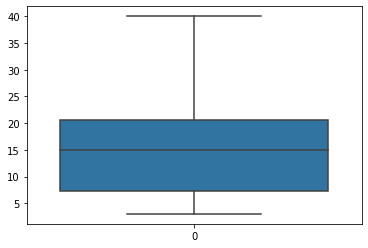

In [9]:
#plotting quartile to quartile using box plot
boxplot = sns.boxplot(data=arr2)

In [10]:
#Use Scipy to calculate skewness & Curtosis and intuition of both
print(stats.skew([1,2,3,4,5.1]))#Measure of Symmetry or lack thereof
#formula for skew
#skew = m3/m2^3/2-->m3-3rd Central moment,m2-second central moment
stats.kurtosis([-28,2,3,4,5])#Measure of Heavy/Light tails

0.042385649089155715


0.21885193839833317

In [11]:
#Test of two Samples(Means) using Z Test
#Assumptions
#population variance is known
#SAMPLE SIZE >30 -- after 30 t/z will be same
#data points are independent
#population follows normal distribution 
arr4=[1,2,3,4,5]
arr5=[101,102,103,104,105]
arr6=[5,6,1,2,3]
#Null Hypothesis in this use case, the two samples are close to each other, alternative hypotheis to prove the samples are different
#Variance/STD is same for both the samples
#hypothesized Mean=0
from statsmodels.stats import weightstats as stests
ztest ,pval1 = stests.ztest(arr4, x2=arr6, value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
#z-score
import math as mt
import statistics
z_stat = (np.mean(arr4)-np.mean(arr6))/mt.sqrt((statistics.variance(arr4)+statistics.variance(arr6))/5)
print(z_stat)
p_val = stats.norm.cdf(z_stat)*2#due to two-tailed test OR 1-2*stats.norm.sf(z_score)
print(p_val)

0.7316005889599014
accept null hypothesis
-0.34299717028501764
0.7316005889599013


In [14]:
#Test of two Sample Means using t-Test assuming Variance unknown & Not Equal(Independent Samples)
#sample size is small
#independent samples (drawn from different normal populations)
#population variance is unknown-t-stat will be calculated from sample variance
from scipy.stats import ttest_ind
ttest,p = ttest_ind(arr4, arr6)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
df = len(arr4) + len(arr6) - 2 - 1#(n-k-1)-We have df to choose 4 values from 5 in Sample #1 and 3 from 5 in Sample #2
print(df)
t_stat = (np.mean(arr4)-np.mean(arr6))/mt.sqrt((statistics.variance(arr4)+statistics.variance(arr6))/5)
print(t_stat)
p_val = stats.t.cdf(t_stat, 7)*2  
print(p_val)
if p_val<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis
7
-0.34299717028501764
0.7416705971201762
accept null hypothesis


In [15]:
#Test of two Samples using F-Test(ANOVA) -- test Using Variance
#assumed
# The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
# The samples are independent.
# Each sample is from a normally distributed population.
# The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
#Sample Use case, different sample population are treated with different drugs to find the efficiency of the drug
#Different Treatment but samples are from the same population and usually they are mutually exclusive samples
from scipy.stats import f_oneway
f_stat, pval = f_oneway(arr4, arr6)
print(f_stat,pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
p_val = stats.f.sf(f_stat, 1, 8)
print(p_val)
#DF(within Group)-->DFd=8(N-k), DF(between Group)DFn=1(k-1)
#formula for F_stat=MSC/MSE MSC being Mean sum of squares between Group, MSE being Mean of total within group SS
#MSC=SSC/k-1,MSE=SSE/N-k
#MSC-->(3.4-3.2)^2+(3.0-3.2)^2=0.08 & 0.08/(2-1)=0.08
Grand_mean = np.mean(np.concatenate((arr4,arr6)))
print(Grand_mean)

0.11764705882352942 0.7404394537249626
accept null hypothesis
0.7404394537249626
3.2


In [16]:
# Paired T-tests for dependent samples -->
#metrics are from the same observations (like before/after a treatment or repeated tests)
#OR observations are dependent in the sense the univariate measure's same for both samples - unemp rate for young/old males
#for convenience use the same data(arr4/arr6)
from scipy.stats import ttest_rel
ttest,pval = ttest_rel(arr4,arr6)#before,after
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.7989658591927786
accept null hypothesis
